# Classificador binário com Naive Bayes em R

O código tem como objetivo aplicar o algoritmo Naive Bayes para prever a classe de crédito de um banco alemão, com base em um conjunto de dados. Ele faz a divisão dos dados em conjuntos de treino e teste, cria o modelo, faz previsões e avalia o desempenho do modelo utilizando a matriz de confusão, taxa de acerto, taxa de erro e curva ROC.

In [1]:
install.packages(c("e1071", "pROC", "caret"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘proxy’, ‘plyr’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘reshape2’




In [2]:
# bibliotecas
library(e1071)
library(pROC)
library(caret)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: ggplot2

Loading required package: lattice



In [3]:
# carregando dados
credito <- read.csv('/content/Credit.csv')

print('Dimensões do dataset:')
print(dim(credito))

print('Primeiras linhas')
print(head(credito))

[1] "Dimensões do dataset:"
[1] 1000   21
[1] "\nPrimeiras linhas"
  checking_status duration                   credit_history             purpose
1              <0        6 'critical/other existing credit'            radio/tv
2        0<=X<200       48                  'existing paid'            radio/tv
3   'no checking'       12 'critical/other existing credit'           education
4              <0       42                  'existing paid' furniture/equipment
5              <0       24             'delayed previously'           'new car'
6   'no checking'       36                  'existing paid'           education
  credit_amount     savings_status employment installment_commitment
1          1169 'no known savings'        >=7                      4
2          5951               <100     1<=X<4                      2
3          2096               <100     4<=X<7                      2
4          7882               <100     4<=X<7                      2
5          4870             

In [5]:
# classe para fator
credito$class <- as.factor(credito$class)

In [7]:
# bases treino e teste
set.seed(123)

amostra <- sample(2, nrow(credito), replace = TRUE, prob=c(0.7, 0.3))
X_train <- credito[amostra == 1,]
X_test <- credito[amostra == 2,]

print("Dimensoes do conjunto de treino:")
print(dim(X_train))

print("Dimensões do conjunto de teste:")
print(dim(X_test))

[1] "Dimensoes do conjunto de treino:"
[1] 705  21
[1] "Dimensões do conjunto de teste:"
[1] 295  21


In [8]:
# modelo naive bayes
modelo <- naiveBayes(class ~., data=X_train)
print("Resumo do modelo:")
print(modelo)

[1] "Resumo do modelo:"

Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
     bad     good 
0.293617 0.706383 

Conditional probabilities:
      checking_status
Y      'no checking'         <0      >=200   0<=X<200
  bad     0.14492754 0.45410628 0.05314010 0.34782609
  good    0.50200803 0.18473896 0.07429719 0.23895582

      duration
Y          [,1]     [,2]
  bad  24.26570 13.14637
  good 19.30321 11.10524

      credit_history
Y      'all paid' 'critical/other existing credit' 'delayed previously'
  bad  0.07246377                       0.16425121           0.10628019
  good 0.03212851                       0.34136546           0.08032129
      credit_history
Y      'existing paid' 'no credits/all paid'
  bad       0.54106280            0.11594203
  good      0.52409639            0.02208835

      purpose
Y      'domestic appliance'   'new car'  'used car'    business   education
  bad           

In [9]:
# previsoes com modelo
y_pred <- predict(modelo, X_test)
y_pred_prob <- predict(modelo, X_test, type="raw")

In [16]:
# matriz de confusao
confusao <- table(Observado=X_test$class, Previsto=y_pred)

print("Matriz de confusão")
print(confusao)

[1] "Matriz de confusão "
         Previsto
Observado bad good
     bad   53   40
     good  30  172


In [17]:
# metricas
acerto <- sum(diag(confusao))/sum(confusao)
erro <- 1 - acerto

print("Métricas de desempenho: ")
print(paste("Taxa de acerto (Acurácia): ", round(acerto*100,2), "%"))
print(paste("Taxa de erro: ", round(erro*100,2), "%"))

[1] "Métricas de desempenho: "
[1] "Taxa de acerto (Acurácia):  76.27 %"
[1] "Taxa de erro:  23.73 %"


In [18]:
# outras metricas
precisao <- confusao[2,2]/sum(confusao[,2])
recall <- confusao[2,2]/sum(confusao[2,])
f1 <- 2 * (precisao*recall)/(precisao+recall)

print(paste("Precisão:", round(precisao*100, 2), "%"))
print(paste("Recall:", round(recall*100, 2), "%"))
print(paste("F1-Score:", round(f1*100, 2), "%"))

[1] "Precisão: 81.13 %"
[1] "Recall: 85.15 %"
[1] "F1-Score: 83.09 %"


Setting levels: control = bad, case = good

Setting direction: controls < cases



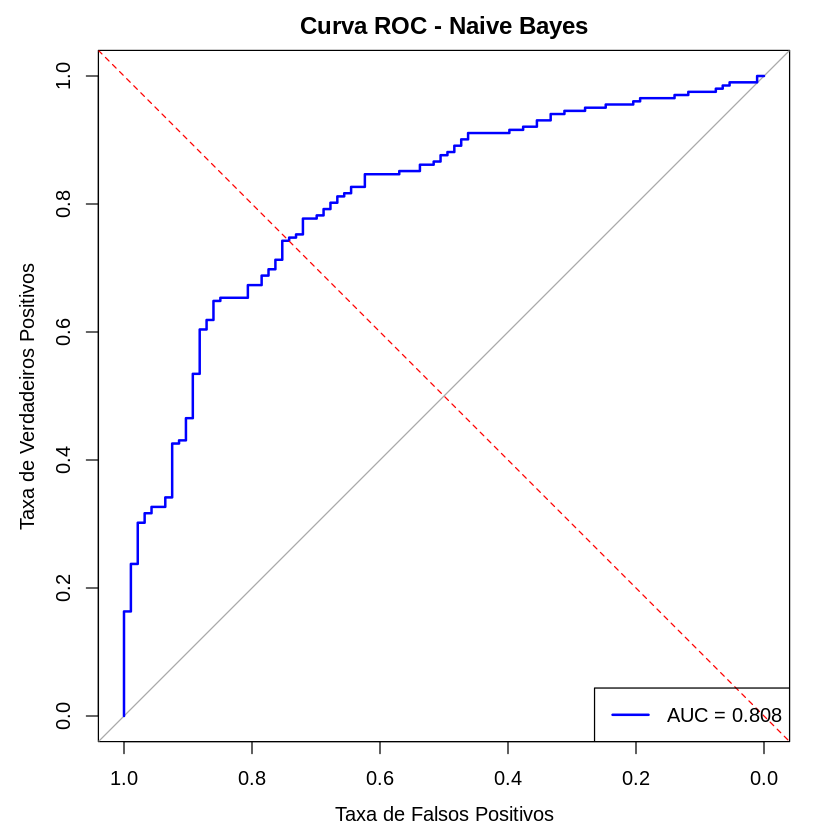

In [19]:
# criando curva ROC
roc_obj <- roc(X_test$class, y_pred_prob[,2])
auc_value <- auc(roc_obj)

plot(
  roc_obj,
  main = "Curva ROC - Naive Bayes",
  col="blue", lwd=2,
  xlab="Taxa de Falsos Positivos",
  ylab="Taxa de Verdadeiros Positivos"
)
abline(a=0, b=1, lty=2, col="red")
legend(
  "bottomright",
  legend=paste("AUC =", round(auc_value, 3)),
  col="blue",lwd=2
)